#  Data Mining - Final project
## Group - G

### Members:
1. Manoj Sai Maguluri  - U13996623
2. Karishma Nagarkunta - U76471581
3. Pragnya Devi Golrilla - U74952497
4. Seshi Reddy Syamala - U57658232


> # Importing all the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Data Preprocessing

> # Reading a CSV file into a DataFrame(df)

In [2]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

In [3]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [6]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [7]:
df.shape

(8763, 26)

In [8]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


> ## Correlation between all the Variables

C:\Users\HP\AppData\Local\Temp\ipykernel_8984\3648873261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

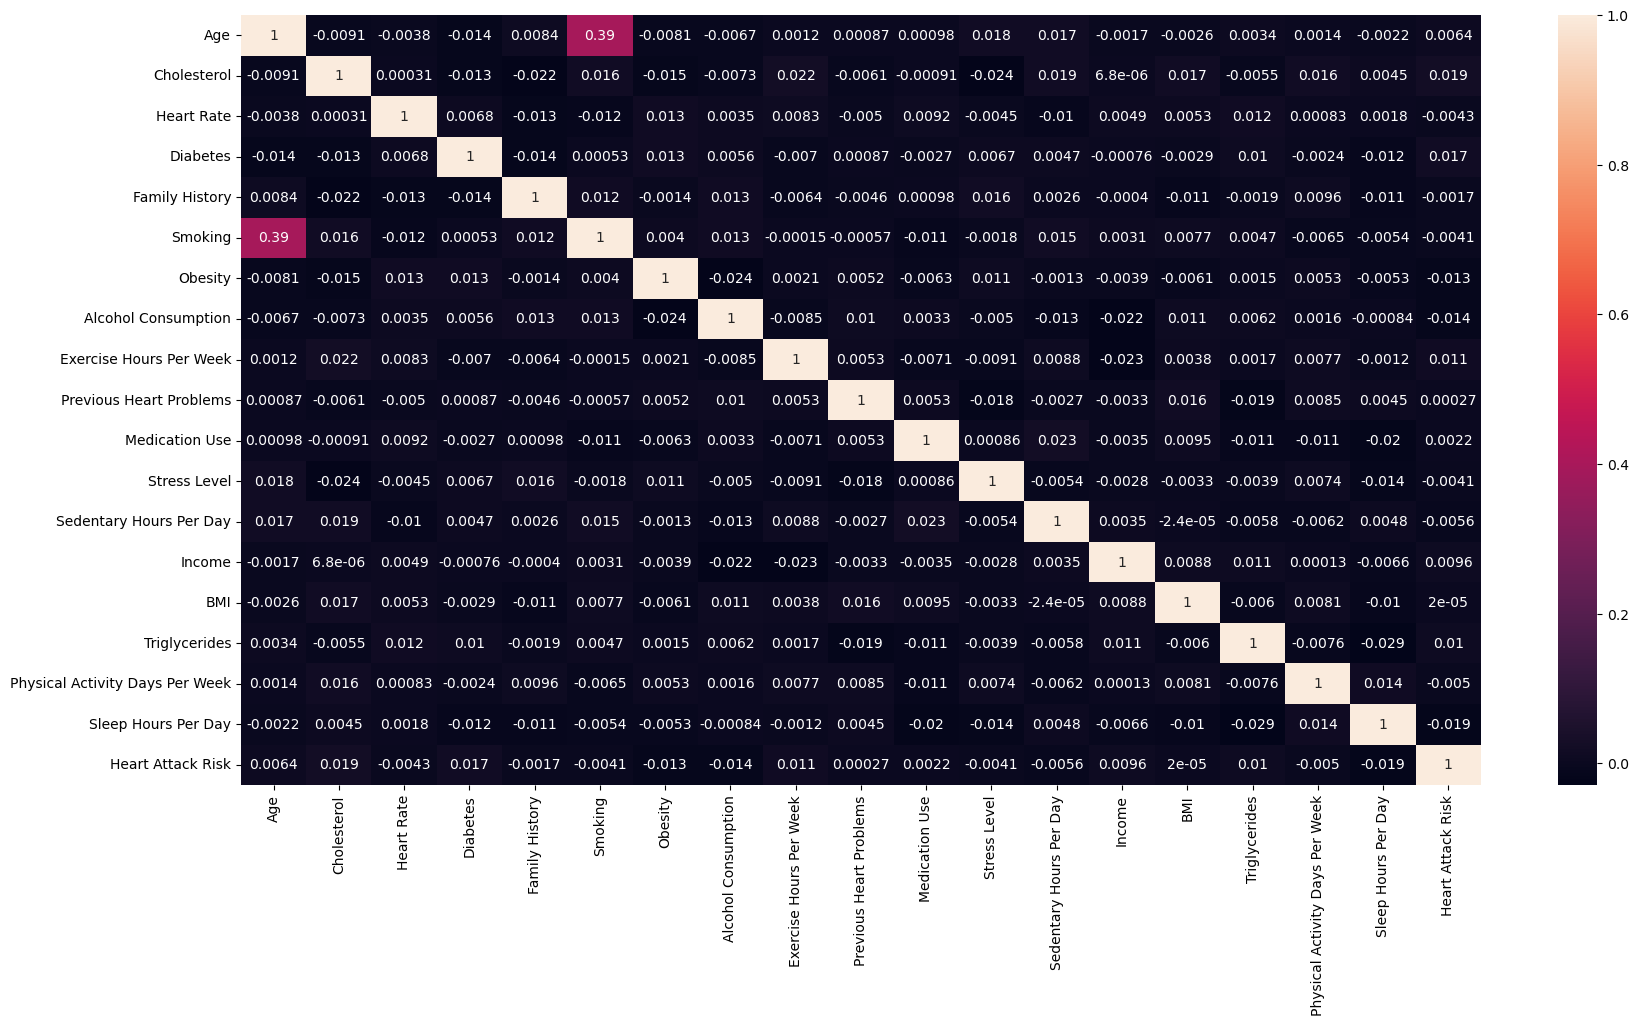

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

> <b> Among all the Independent Variables Age and Smoke is having relatively high positive correlation coefficient whereas other Independent variables have very low correlation coefficient. 

# Converting the Blood pressure column into High, Low, Normal categories 

>> #### Conerting the Blood Pressure column directly to cateogorical columns by label encoding will not give an accurate result as there is a repition in the values. Coverting into High, Low and Normal will give the better results

In [10]:
def blp(value):
    x = value[0:value.index('/')]
    y = value[value.index('/')+1:len(value)]
    if int(x)>140 and int(y)>90:
        return 'High'
    elif int(x)<100 and int(y)<70:
        return 'Low'
    else :
        return 'Normal'

In [11]:
df['blood_pressure_cat'] = df['Blood Pressure'].apply(blp)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,blood_pressure_cat
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,Normal
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,High
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,High
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,High
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,Normal


> # Replacing target variable for better visualizations

In [12]:
df['Heart Attack Risk'] = df['Heart Attack Risk'].replace(to_replace = [0,1],value=['no','yes'])

>> #### Heart Attack Risk column is considered as Integer which may not give better visualizations, For getting the better visualizations we need to convert it into an object. Hence 0,1 is replaced with No and Yes respectively

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

# Visualizations

> #### Selecting the Numerical columns first

In [14]:
df_num = df[['Age','Cholesterol','Heart Rate','Exercise Hours Per Week','Sedentary Hours Per Day','Income','BMI','Triglycerides']]
df_num.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides
0,67,208,72,4.168189,6.615001,261404,31.251233,286
1,21,389,98,1.813242,4.963459,285768,27.194973,235
2,21,324,72,2.078353,9.463426,235282,28.176571,587
3,84,383,73,9.828130,7.648981,125640,36.464704,378
4,66,318,93,5.804299,1.514821,160555,21.809144,231


> ### Creating a Grid of subplots to display Boxplots to visualize the relationship between Numerical features and the Heart Attack Risk in a dataset

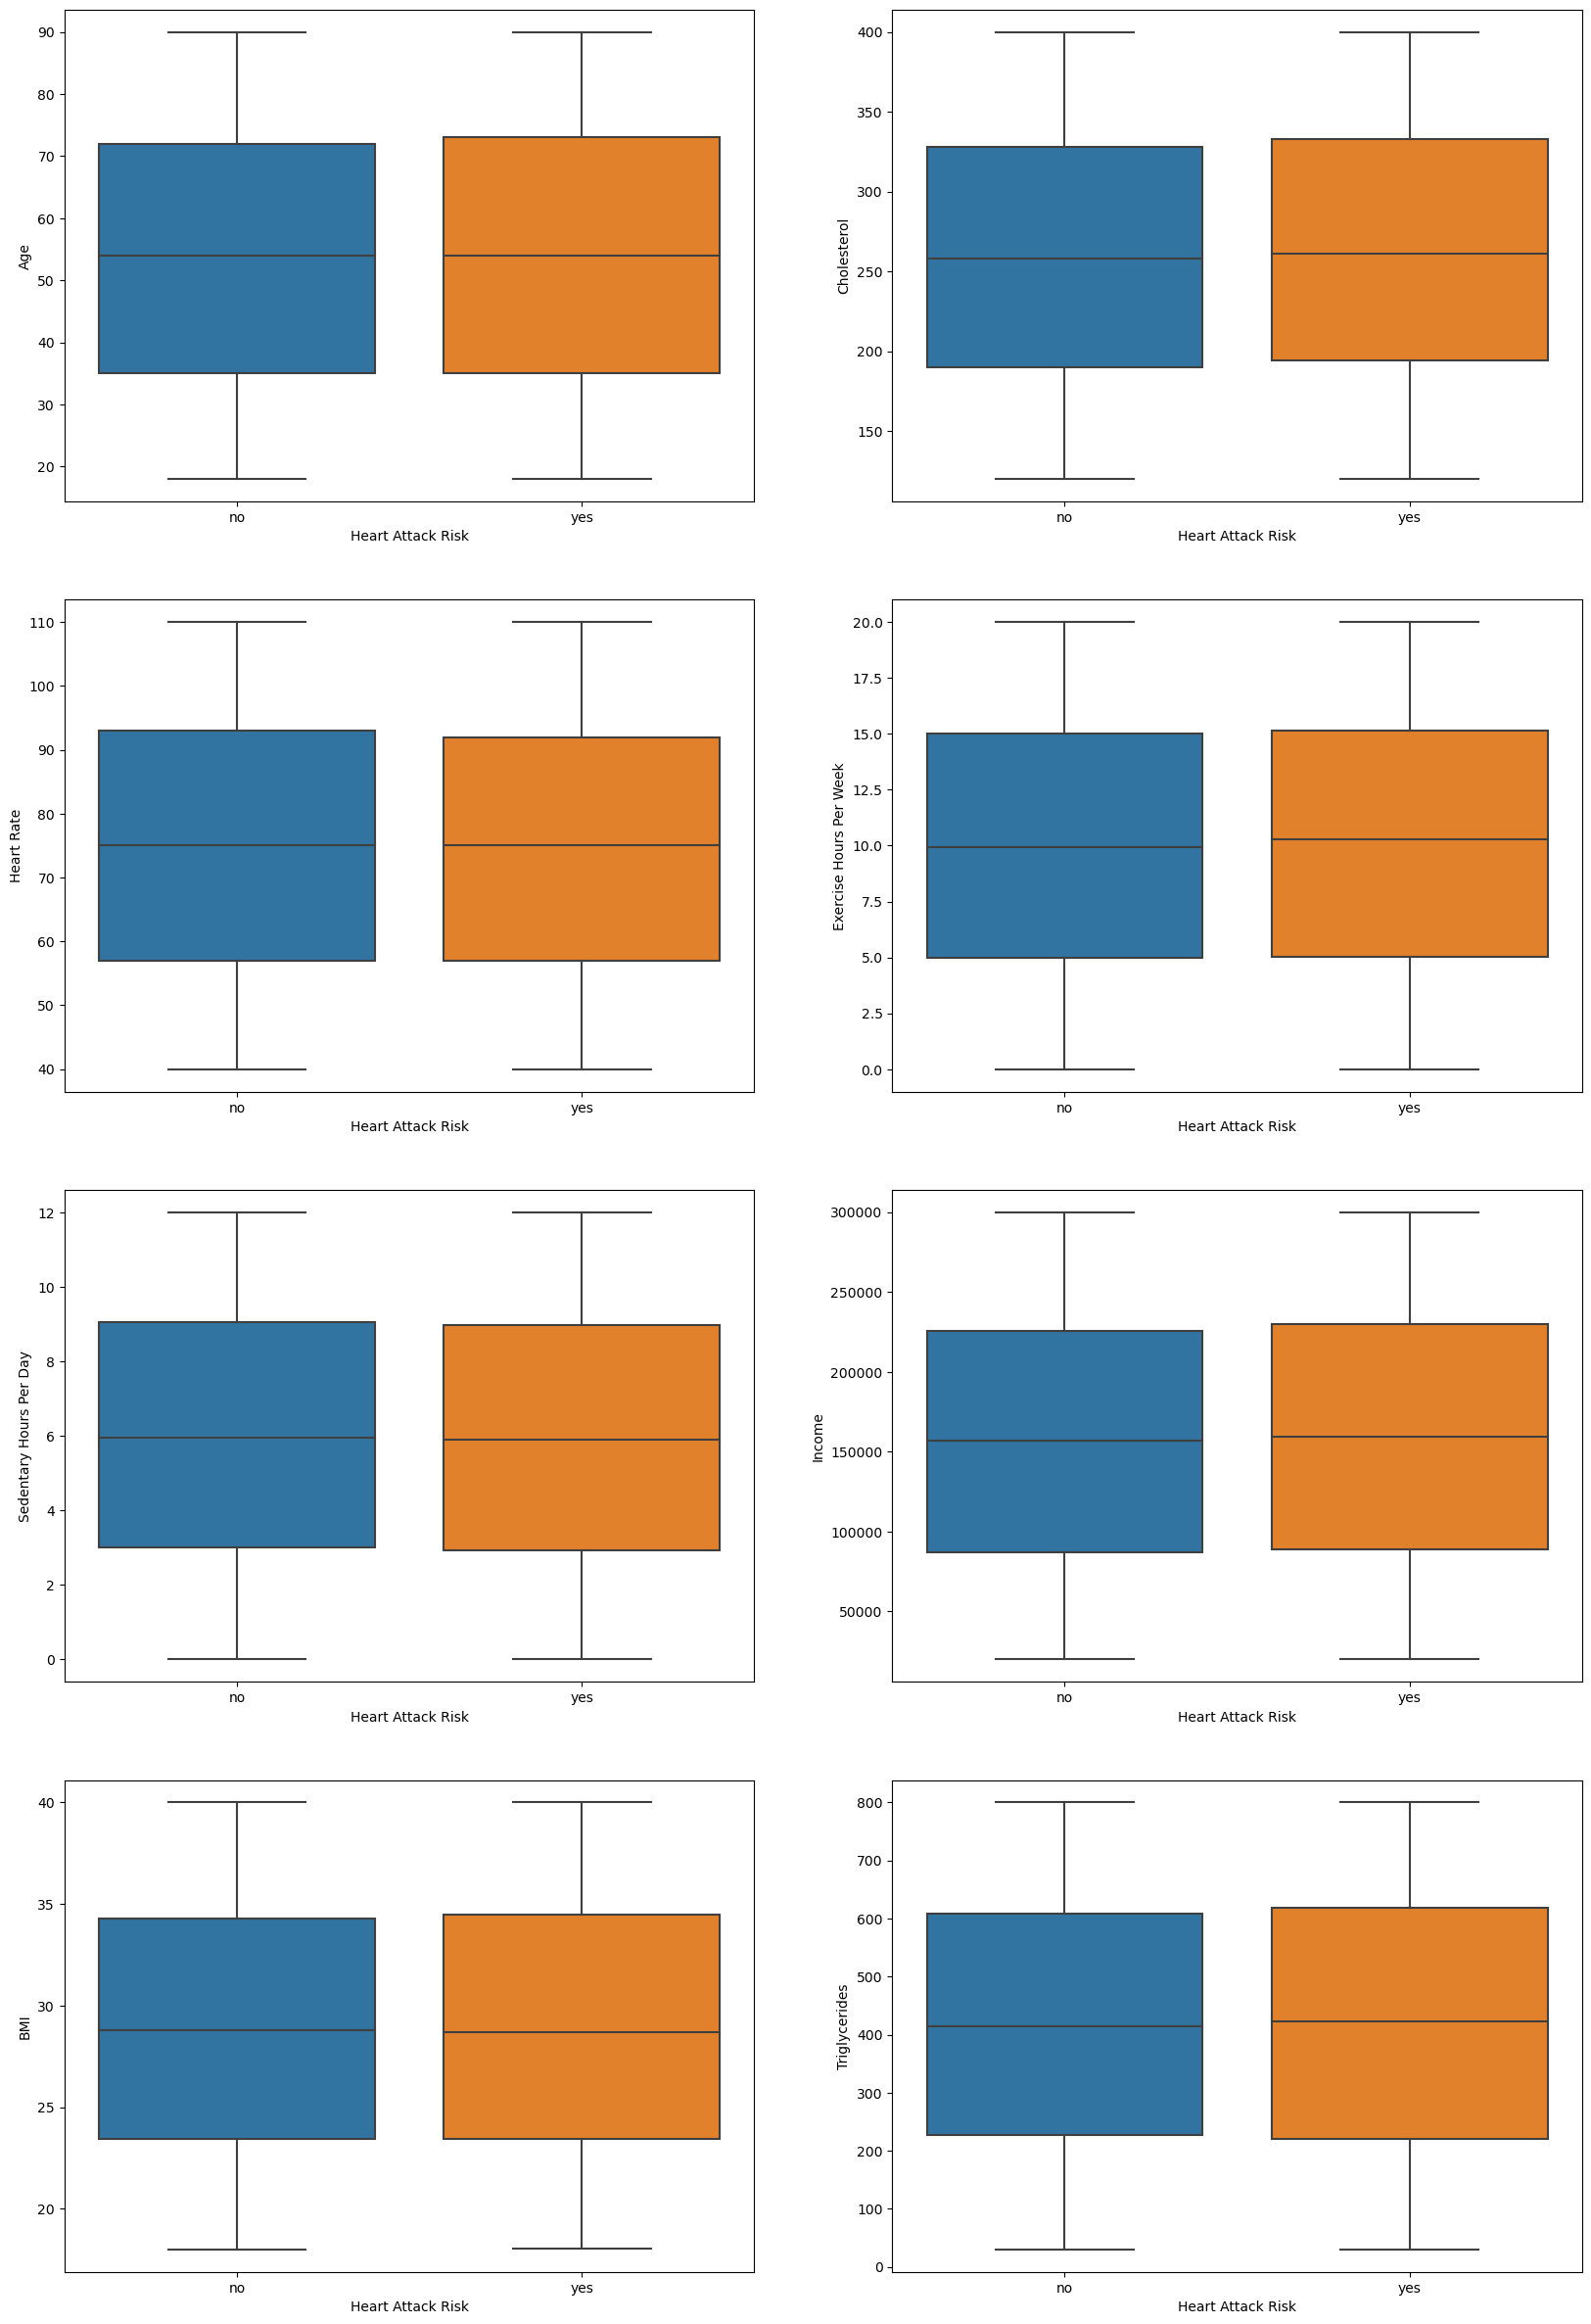

In [15]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,30))
for v,s in zip(df_num.columns,ax.flatten()):
    sns.boxplot(x=df['Heart Attack Risk'],y=df_num[v],ax=s)
plt.show()

> ### <i> From the above box plot visuals, It is evident that there is no significant correlation between numerical features in the dataset and to the Heart Attack Risk.

In [16]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'blood_pressure_cat'],
      dtype='object')

> ### Separating the categorical or non-numeric data from the DataFrame 

In [17]:
df_cat = df.drop(['Age','Cholesterol','Heart Rate','Exercise Hours Per Week','Sedentary Hours Per Day',
                  'Income','BMI','Triglycerides','Patient ID','Blood Pressure','Heart Attack Risk'],axis=1)
df_cat.head()

,Sex,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,blood_pressure_cat
0,Male,0,0,1,0,0,Average,0,0,9,0,6,Argentina,South America,Southern Hemisphere,Normal
1,Male,1,1,1,1,1,Unhealthy,1,0,1,1,7,Canada,North America,Northern Hemisphere,High
2,Female,1,0,0,0,0,Healthy,1,1,9,4,4,France,Europe,Northern Hemisphere,High
3,Male,1,1,1,0,1,Average,1,0,9,3,4,Canada,North America,Northern Hemisphere,High
4,Male,1,1,1,1,0,Unhealthy,1,0,6,1,5,Thailand,Asia,Northern Hemisphere,Normal


> ### Creating a Grid of subplots to display Histogram plots to visualize the relationship between Categorical features and the Heart Attack Risk in the dataset.

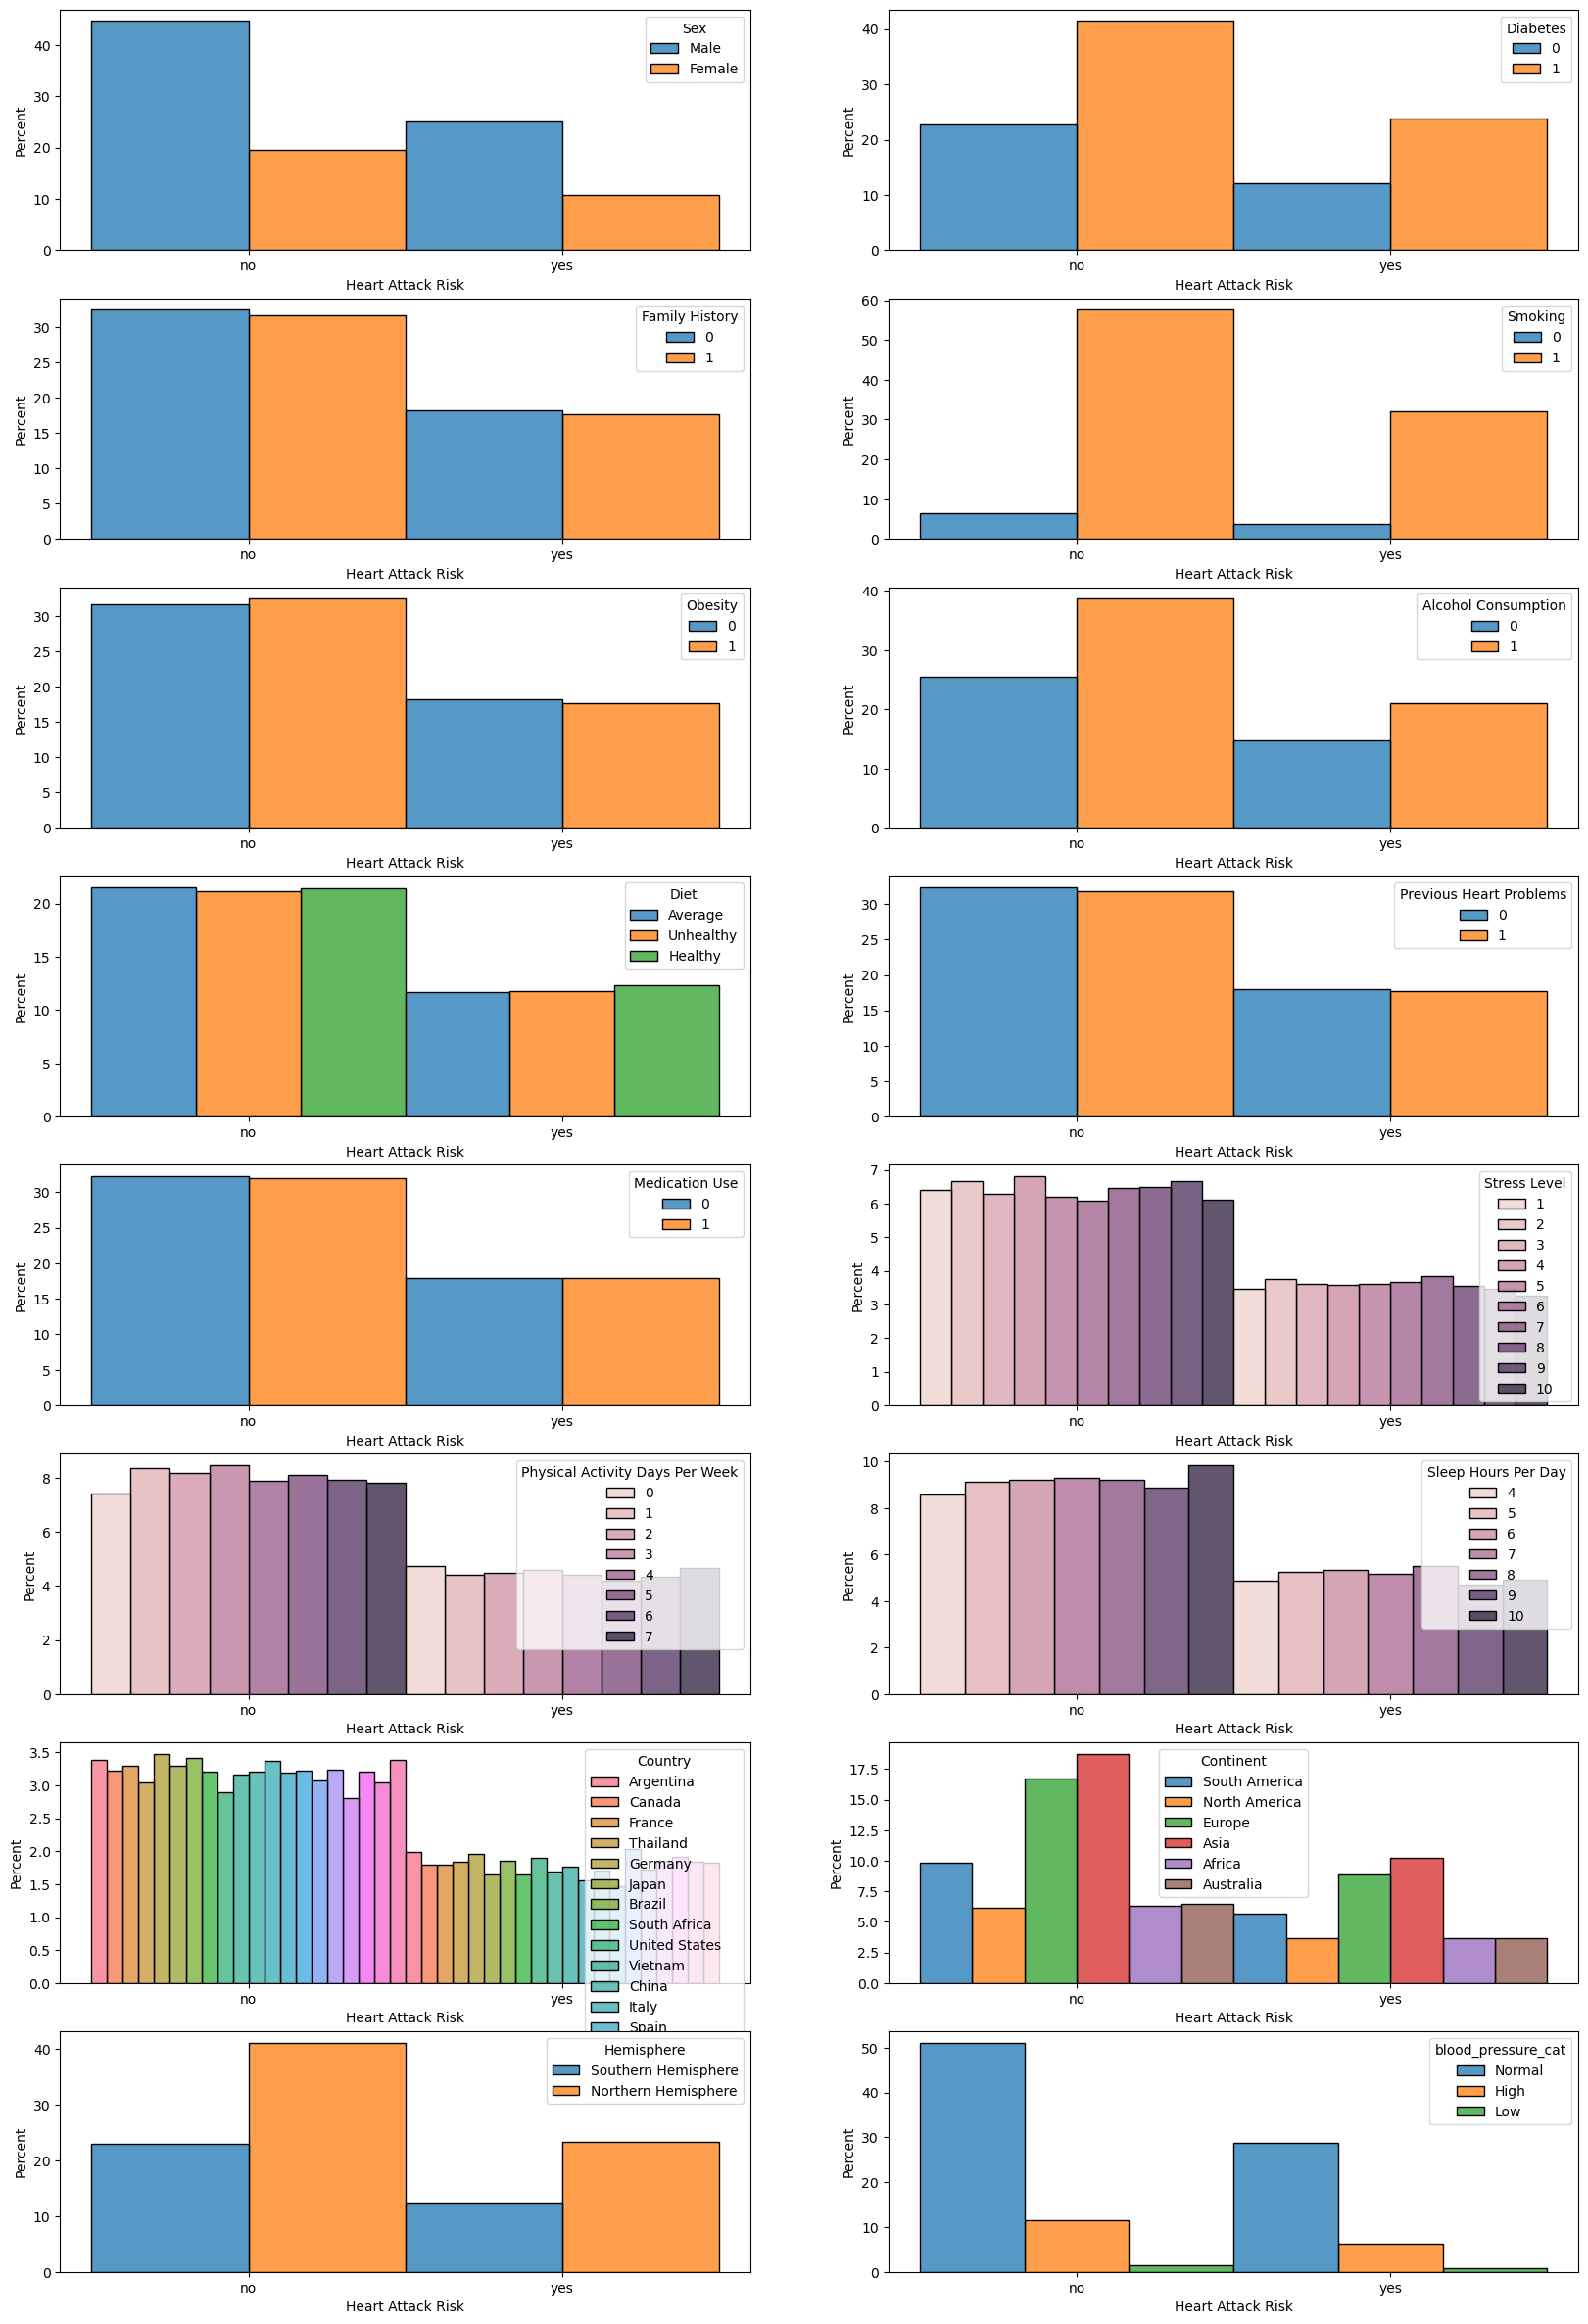

In [18]:
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=(20,30))
for v,s in zip(df_cat.columns,ax.flatten()):
    sns.histplot(x=df['Heart Attack Risk'],hue=df_cat[v],stat='percent',multiple='dodge',ax=s)
plt.show()

> ### <i>The imbalance in the dataset's classes within the 'Heart Attack Risk' and other categorical variables hinders our ability to predict results effectively. This imbalance can lead to Bias in Predictions,Misleading Accuracy, Inadequate Learning.

In [19]:
df_num_col = df.select_dtypes(include=['int64', 'float64'])
df_num_col

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## Encoding the Categorical Variables

> #### Machine learning models require numerical input. Hence, categorical variables need to be transformed or encoded into numerical representations. Label Encoding assigns a unique integer to each category.

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Blood Pressure'] = label_encoder.fit_transform(df['Blood Pressure'])
df['Diet'] = label_encoder.fit_transform(df['Diet'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Continent'] = label_encoder.fit_transform(df['Continent'])
df['Hemisphere'] = label_encoder.fit_transform(df['Hemisphere'])
df['blood_pressure_cat'] = label_encoder.fit_transform(df['blood_pressure_cat'])
df['Heart Attack Risk'] = label_encoder.fit_transform(df['Heart Attack Risk'])

In [22]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,blood_pressure_cat
0,BMW7812,67,1,208,2510,72,0,0,1,0,...,261404,31.251233,286,0,6,0,5,1,0,2
1,CZE1114,21,1,389,2815,98,1,1,1,1,...,285768,27.194973,235,1,7,3,4,0,0,0
2,BNI9906,21,0,324,3224,72,1,0,0,0,...,235282,28.176571,587,4,4,6,3,0,0,0
3,JLN3497,84,1,383,2689,73,1,1,1,0,...,125640,36.464704,378,3,4,3,4,0,0,0
4,GFO8847,66,1,318,3563,93,1,1,1,1,...,160555,21.809144,231,1,5,16,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,3680,61,1,1,1,0,...,235420,19.655895,67,7,7,16,1,0,0,2
8759,QSV6764,28,0,120,2434,73,1,0,0,1,...,217881,23.993866,617,4,9,3,4,0,0,0
8760,XKA5925,47,1,250,2624,105,0,1,1,1,...,36998,35.406146,527,4,4,2,5,1,1,2
8761,EPE6801,36,1,178,838,60,1,0,1,0,...,209943,27.294020,114,2,8,2,5,1,0,2


## Dependent and Independent Variables

> #### The dependent variable is the outcome or response that is being studied and measured whereas Independent variable is the variable that is used to predict or explain the changes in the dependent variable.

In [23]:
y = df['Heart Attack Risk']
X = df[['Age', 'Sex', 'Cholesterol',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere','blood_pressure_cat']]


In [24]:
X

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,blood_pressure_cat
0,67,1,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,0,5,1,2
1,21,1,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,1,7,3,4,0,0
2,21,0,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,4,6,3,0,0
3,84,1,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,3,4,3,4,0,0
4,66,1,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,1,5,16,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,10.806373,235420,19.655895,67,7,7,16,1,0,2
8759,28,0,120,73,1,0,0,1,0,16.558426,...,3.833038,217881,23.993866,617,4,9,3,4,0,0
8760,47,1,250,105,0,1,1,1,1,3.148438,...,2.375214,36998,35.406146,527,4,4,2,5,1,2
8761,36,1,178,60,1,0,1,0,0,3.789950,...,0.029104,209943,27.294020,114,2,8,2,5,1,2


In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

## Predicting the Significant and Insignificant Variables using Logistic Regression

> #### Significant variable has a notable impact on the probability of the occurrence of the outcome variable whereas Changes in the value of the insignificant variable are not associated with changes in the likelihood of the outcome variable.

In [26]:
lr_model=sm.Logit(y_train,x_train).fit()
lr_model.summary()

Optimization terminated successfully.
         Current function value: 0.652089
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Heart Attack Risk   No. Observations:                 6134
Model:                          Logit   Df Residuals:                     6110
Method:                           MLE   Df Model:                           23
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:               0.0009917
Time:                        22:40:34   Log-Likelihood:                -3999.9
converged:                       True   LL-Null:                       -4003.9
Covariance Type:            nonrobust   LLR p-value:                    0.9985
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                -0.0002      0.001     -0.124      0.901      -0.003       0.003
Sex                                 0.0340      0.070      0.486      0.627      -0.103       0.171
Cholesterol                     -8.872e-05      0.000     -0.280      0.779      -0.001       0.001
Heart Rate                         -0.0022      0.001     -1.775      0.076      -0.005       0.000
Diabetes                            0.0924      0.056      1.657      0.097      -0.017       0.202
Family History                     -0.0010      0.053     -0.020      0.984      -0.105       0.103
Smoking                            -0.1540      0.113     -1.361      0.173      -0.376       0.068
Obesity                            -0.0759      0.053     -1.430      0.153      -0.180       0.028
Alcohol Consumption                -0.0445      0.054     -0.825      0.410      -0.150       0.061
Exercise Hours Per Week         -4.329e-05      0.005     -0.010      0.992      -0.009       0.009
Diet                                0.0150      0.033      0.459      0.646      -0.049       0.079
Previous Heart Problems             0.0361      0.053      0.679      0.497      -0.068       0.140
Medication Use                   4.275e-05      0.053      0.001      0.999      -0.104       0.104
Stress Level                        0.0073      0.009      0.793      0.428      -0.011       0.025
Sedentary Hours Per Day            -0.0046      0.008     -0.612      0.541      -0.020       0.010
Income                           8.102e-09   3.24e-07      0.025      0.980   -6.27e-07    6.43e-07
BMI                                -0.0066      0.004     -1.723      0.085      -0.014       0.001
Triglycerides                       0.0001      0.000      0.864      0.388      -0.000       0.000
Physical Activity Days Per Week    -0.0095      0.012     -0.813      0.416      -0.032       0.013
Sleep Hours Per Day                -0.0186      0.013     -1.479      0.139      -0.043       0.006
Country                            -0.0016      0.005     -0.308      0.758      -0.012       0.008
Continent                          -0.0016      0.018     -0.089      0.929      -0.037       0.034
Hemisphere                         -0.0639      0.058     -1.093      0.274      -0.178       0.051
blood_pressure_cat                  0.0278      0.034      0.816      0.414      -0.039       0.095
===================================================================================================
"""

> #### In general, if p value is less than 5%, those variables are considered as significant and the variables are having p value less than 5% and 

## Spliting the Data by considering the significant variables

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
classifier_logistic = LogisticRegression()
lr_model = classifier_logistic.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
lr_acc = round(accuracy_score(y_test, y_pred), 3)
lr_matrix = confusion_matrix(y_test, y_pred)
yy_prob = lr_model.predict_proba(x_test)

lr_prec = precision_score(y_test,y_pred)
lr_rec = recall_score(y_test,y_pred)
lr_train_accuracy=accuracy_score(y_train,lr_model.predict(x_train))
lr_test_accuracy=accuracy_score(y_test,y_pred)

print(f'Train Data Accuracy of Logistic Regression model is {lr_train_accuracy * 100}%')
print(f'Test Data Accuracy of Logistic Regression model is {lr_test_accuracy * 100}%')
print(f'Precision of Logistic Regression model is {lr_prec * 100}%')
print(f'Recall of Logistic Regression model is {lr_rec * 100}%')
print("Confusion Matrix:\n", lr_matrix)
print("Predicted Probabilities:\n", yy_prob)


Train Data Accuracy of Logistic Regression model is 64.11803064884252%
Test Data Accuracy of Logistic Regression model is 64.32103461392164%
Precision of Logistic Regression model is 0.0%
Recall of Logistic Regression model is 0.0%
Confusion Matrix:
 [[1691    0]
 [ 938    0]]
Predicted Probabilities:
 [[0.64242471 0.35757529]
 [0.65121292 0.34878708]
 [0.60334293 0.39665707]
 ...
 [0.62868072 0.37131928]
 [0.59787085 0.40212915]
 [0.62284718 0.37715282]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN Classification

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

yy = df['Heart Attack Risk']
xx = df[['Heart Rate', 'Diabetes', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Previous Heart Problems', 'Stress Level', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Hemisphere']]
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, random_state=10, test_size=0.3)
knn = KNeighborsClassifier()
knn_model=knn.fit(xx_train, yy_train)
knn_y_pred = knn_model.predict(xx_test)
knn_conf_matrix = confusion_matrix(yy_test,knn_y_pred)

knn_prec = precision_score(yy_test, knn_y_pred)
knn_rec = recall_score(yy_test,knn_y_pred)
knn_train_accuracy=accuracy_score(yy_train,knn_model.predict(xx_train))
knn_test_accuracy=accuracy_score(yy_test,knn_y_pred)

print(f'Train Data Accuracy of KNN Classifier model is {knn_train_accuracy * 100}%')
print(f'Test Data Accuracy of KNN Classifier model is {knn_test_accuracy * 100}%')
print(f'Precision of KNN forest classifier model is {knn_prec * 100}%')
print(f'Recall of KNN forest classifier model is {knn_rec * 100}%')


Train Data Accuracy of KNN Classifier model is 72.33452885555917%
Test Data Accuracy of KNN Classifier model is 56.789653860783574%
Precision of KNN forest classifier model is 34.62732919254658%
Recall of KNN forest classifier model is 23.773987206823026%


## XG Boost

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

xgb = XGBClassifier()
xgb_model=xgb.fit(x_train, y_train)
pred_test_xgboost = xgb_model.predict(x_test)
xgboost_matrix = confusion_matrix(y_test, pred_test_xgboost)

print("Confusion Matrix for XGBoost:")
print(xgboost_matrix)

xg_prec = precision_score(y_test, pred_test_xgboost)
xg_rec = recall_score(y_test,pred_test_xgboost)
xg_train_accuracy=accuracy_score(y_train,xgb_model.predict(x_train))
xg_test_accuracy=accuracy_score(y_test,pred_test_xgboost)

print(f'Train Data Accuracy of XGBoost classifier model is {xg_train_accuracy * 100}%')
print(f'Test Data Accuracy of XGBoost classifier model is {xg_test_accuracy * 100}%')
print(f'Precision of XGBoost model is {xg_prec * 100}%')
print(f'Recall of XGBoost model is {xg_rec * 100}%')

Confusion Matrix for XGBoost:
[[1328  363]
 [ 739  199]]
Train Data Accuracy of XGBoost classifier model is 98.82621454189761%
Test Data Accuracy of XGBoost classifier model is 58.08292126283759%
Precision of XGBoost model is 35.40925266903915%
Recall of XGBoost model is 21.215351812366738%


## Decicsion Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
tree_matrix = confusion_matrix(y_test, dt_y_pred)

dt_prec = precision_score(y_test, dt_y_pred)
dt_rec = recall_score(y_test,dt_y_pred)
dt_train_accuracy=accuracy_score(y_train,dt_model.predict(x_train))
dt_test_accuracy=accuracy_score(y_test,dt_y_pred)
    
print(f'Test Data Accuracy of Decision Tree classifier model is {dt_test_accuracy * 100}%')
print(f'Precision of Decision tree model is {dt_prec * 100}%')
print(f'Recall of Decision tree model is {dt_rec * 100}%')


Test Data Accuracy of Decision Tree classifier model is 52.947888931152534%
Precision of Decision tree model is 35.829383886255926%
Recall of Decision tree model is 40.298507462686565%


## Plotting the Tree

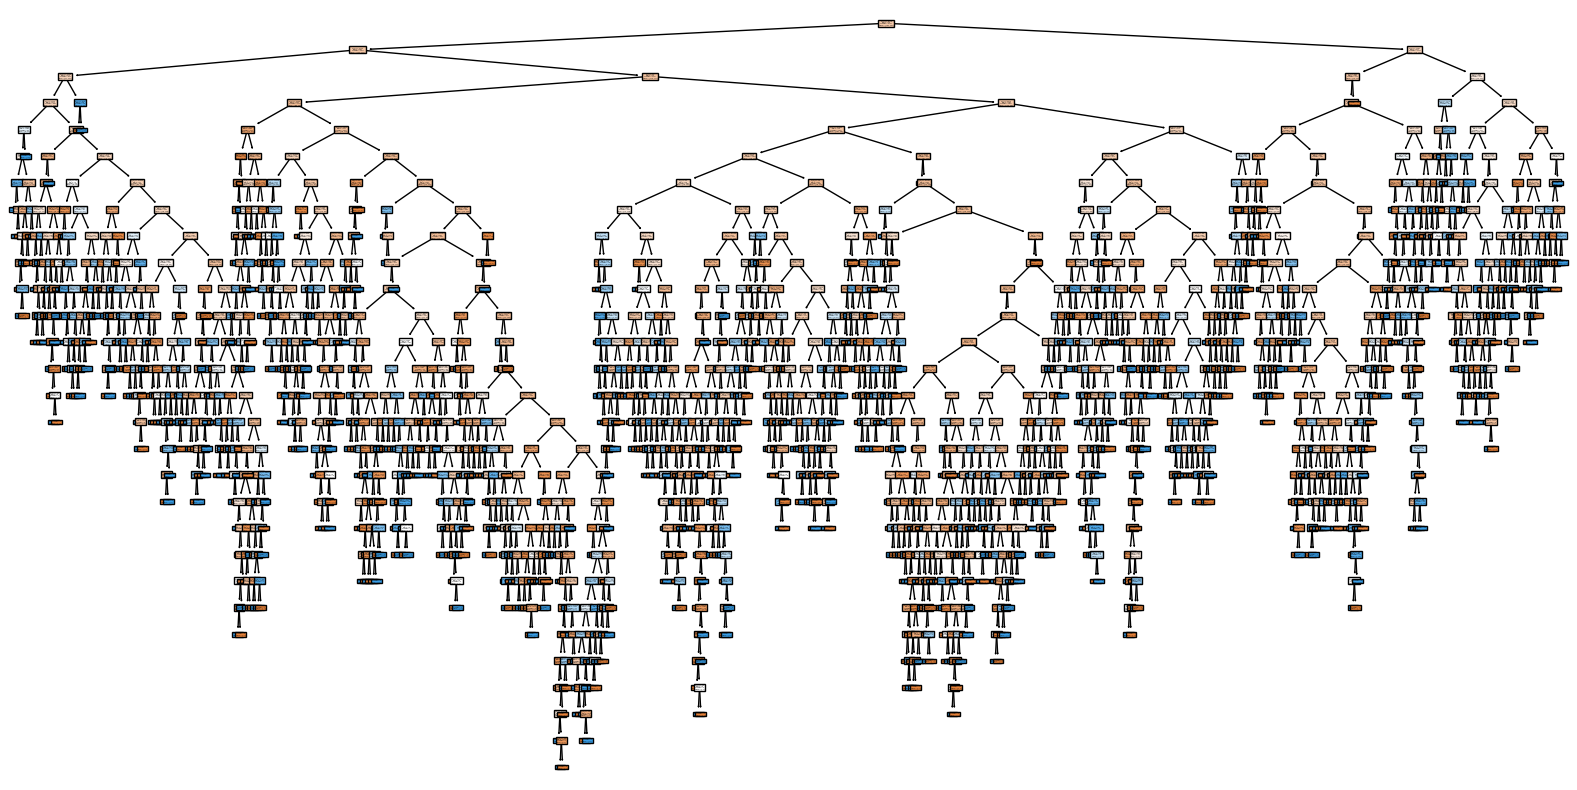

In [31]:
from sklearn.tree import plot_tree
feature_names_list = df.columns.tolist()
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled= True)
plt.show()

## RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_prec = precision_score(y_test, rf_y_pred)
rf_rec = recall_score(y_test,rf_y_pred)
rf_train_accuracy=accuracy_score(y_train,rf_model.predict(x_train))
rf_test_accuracy=accuracy_score(y_test,rf_y_pred)

print(f'Train Data Accuracy of XGBoost classifier model is {rf_train_accuracy * 100}%')
print(f'Test Data Accuracy of XGBoost classifier model is {rf_test_accuracy * 100}%')
print(f'Precision of Random forest classifier model is {rf_prec * 100}%')
print(f'Recall of Random forest classifier model is {rf_rec * 100}%')

Train Data Accuracy of XGBoost classifier model is 100.0%
Test Data Accuracy of XGBoost classifier model is 63.48421453023963%
Precision of Random forest classifier model is 34.72222222222222%
Recall of Random forest classifier model is 2.6652452025586353%


## Adaboost Classifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada_model=ada.fit(x_train,y_train)
y_pred_ada=ada_model.predict(x_test)
accuracy_ada=accuracy_score(y_test,y_pred_ada)
print("The accuracy score is :",accuracy_ada)
ada_train_accuracy=accuracy_score(y_train,ada_model.predict(x_train))
ada_test_accuracy=accuracy_score(y_test,y_pred_ada)
ada_matrix = confusion_matrix(y_test, y_pred_ada)

print(f'Train Data Accuracy of XGBoost classifier model is {ada_train_accuracy * 100}%')
print(f'Test Data Accuracy of XGBoost classifier model is {ada_test_accuracy * 100}%')

prec_ada=precision_score(y_test,y_pred_ada)
recall_ada = recall_score(y_test,y_pred_ada)
print("The precision of the model is :",prec_ada)
print("The Recall Score of the model is :",recall_ada)

The accuracy score is : 0.6413084823126665
Train Data Accuracy of XGBoost classifier model is 64.65601565047278%
Test Data Accuracy of XGBoost classifier model is 64.13084823126664%
The precision of the model is : 0.42857142857142855
The Recall Score of the model is : 0.015991471215351813


## GradientBoostingClassifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc_model=gbc.fit(x_train,y_train)
y_pred_gbc=gbc_model.predict(x_test)
train_accuracy_gbc=accuracy_score(y_train,gbc_model.predict(x_train))
test_accuracy_gbc=accuracy_score(y_test,y_pred_gbc)
gbc_matrix = confusion_matrix(y_test, y_pred_gbc)

print("The accuracy score for the train data is :",train_accuracy_gbc)
print("The accuracy score of test data is :",test_accuracy_gbc)
prec_gbc=precision_score(y_test,y_pred_gbc)
recall_gbc=recall_score(y_test,y_pred_gbc)
print("The precision of the model is :",prec_gbc)
print("The Recall score of the model is :",recall_gbc)

The accuracy score for the train data is : 0.6741115096185197
The accuracy score of test data is : 0.6367440091289464
The precision of the model is : 0.36923076923076925
The Recall score of the model is : 0.0255863539445629


> ### Creating a Dataframe which portrays the Accuracy, Precision and Recall Scores of all Models

In [35]:
m=["Logistic regression","K-neighbors", "Decision Tree", "Random Forest",'XGBoost','Adaboost','Gradient Boosting']
tea= [lr_test_accuracy,knn_test_accuracy,dt_test_accuracy,rf_test_accuracy,xg_test_accuracy,ada_test_accuracy,test_accuracy_gbc]
p=[lr_prec,knn_prec,dt_prec,rf_prec,xg_prec,prec_ada,prec_gbc]
r=[lr_rec,knn_rec,dt_rec,rf_rec,xg_rec,recall_ada,recall_gbc]

In [36]:
model_df2=pd.DataFrame({"model":m,"test accuracy": tea,"precision":p,"recall Score":r})
model_df2

,model,test accuracy,precision,recall Score
0,Logistic regression,0.643210,0.000000,0.000000
1,K-neighbors,0.567897,0.346273,0.237740
2,Decision Tree,0.529479,0.358294,0.402985
3,Random Forest,0.634842,0.347222,0.026652
4,XGBoost,0.580829,0.354093,0.212154
5,Adaboost,0.641308,0.428571,0.015991
6,Gradient Boosting,0.636744,0.369231,0.025586


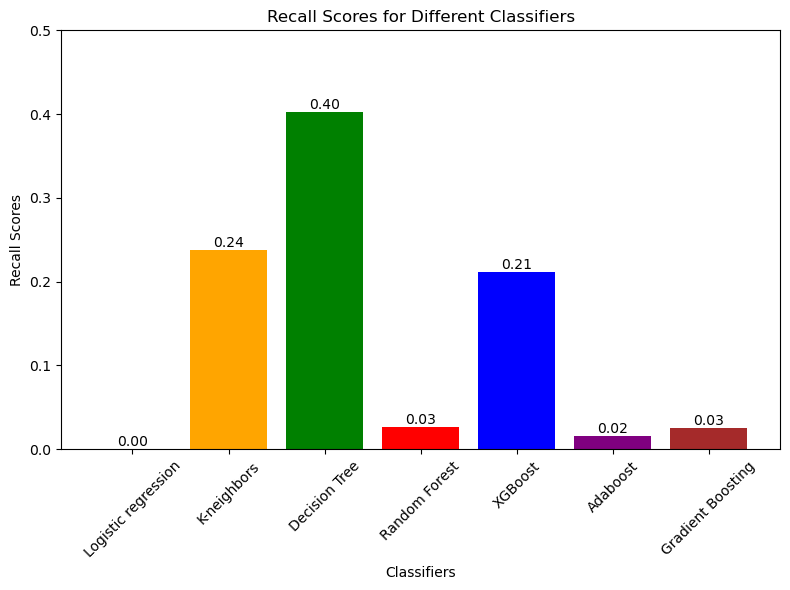

In [37]:
colors = ['red', 'orange', 'green', 'red', 'blue', 'purple', 'brown'] 
plt.figure(figsize=(8, 6))
bars = plt.bar(m, r, color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Recall Scores')
plt.title('Recall Scores for Different Classifiers')
plt.bar_label(bars, labels=[f"{score:.2f}" for score in r], label_type='edge', color='black')
plt.ylim(0, 0.5)  # Set the y-axis limit from 0 to 1 (as recall scores are between 0 and 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

> ## <i> <font color='black'> <div style='background-color:yellow'> Among the above seven models considered, Decision Tree Model was identified as the most suitable choice due to its balanced performance across various metrics like Accuracy, Precision and Recall scores.

> ## <i> <font color='black'> <div style='background-color:yellow'> Decision Tree exhibited a favorable recall score, emphasizing its proficiency in capturing relevant instances within the dataset, thus minimizing false negatives.

## Decision Tree Feature importance scores

In [38]:
df_dt_sig=pd.DataFrame({"features":X.columns,"significance":dt_model.feature_importances_})
df_dt_sig=df_dt_sig.sort_values(by='significance',ascending=False)
df_dt_sig

,features,significance
17,Triglycerides,0.101828
16,BMI,0.094872
14,Sedentary Hours Per Day,0.093774
2,Cholesterol,0.088372
15,Income,0.085347
9,Exercise Hours Per Week,0.075380
0,Age,0.071315
3,Heart Rate,0.062426
13,Stress Level,0.057016
20,Country,0.050923


### <i><font color='black'> <div style='background-color:yellow'> The feature importances attribute represents the relative importance of each feature in the model. The values provides a quick way to identify the most influential features used by the model during the training process.  Sedentary Hours Per Day, BMI, Triglycerides features have more impact on the model's predictions. More over Sedentary Hours Per Day, BMI, Triglycerides are more important in the model's decision-making process.

> ### Feature Importance Scores of all classifiers

In [39]:
df_rf_sig=pd.DataFrame({"features":X.columns,"significance":rf_model.feature_importances_})
df_rf_sig=df_rf_sig.sort_values(by='significance',ascending=False)
df_gb_sig=pd.DataFrame({"features":X.columns,"significance":gbc_model.feature_importances_})
df_gb_sig=df_gb_sig.sort_values(by='significance',ascending=False)
df_xg_sig=pd.DataFrame({"features":X.columns,"significance":xgb_model.feature_importances_})
df_xg_sig=df_xg_sig.sort_values(by='significance',ascending=False)
df_ada_sig=pd.DataFrame({"features":X.columns,"significance":ada_model.feature_importances_})
df_ada_sig=df_ada_sig.sort_values(by='significance',ascending=False)
df2= pd.concat([df_dt_sig,df_gb_sig,df_rf_sig,df_ada_sig,df_xg_sig],axis=1)
df2


,features,significance,features,significance,features,significance,features,significance,features,significance
17,Triglycerides,0.101828,Triglycerides,0.092462,Triglycerides,0.082949,Triglycerides,0.08,Triglycerides,0.040079
16,BMI,0.094872,BMI,0.126868,BMI,0.083404,BMI,0.20,BMI,0.041045
14,Sedentary Hours Per Day,0.093774,Sedentary Hours Per Day,0.126013,Sedentary Hours Per Day,0.084944,Sedentary Hours Per Day,0.16,Sedentary Hours Per Day,0.041341
2,Cholesterol,0.088372,Cholesterol,0.074098,Cholesterol,0.081309,Cholesterol,0.12,Cholesterol,0.044086
15,Income,0.085347,Income,0.121414,Income,0.082258,Income,0.08,Income,0.042015
9,Exercise Hours Per Week,0.075380,Exercise Hours Per Week,0.161937,Exercise Hours Per Week,0.086523,Exercise Hours Per Week,0.16,Exercise Hours Per Week,0.042071
0,Age,0.071315,Age,0.066648,Age,0.073171,Age,0.00,Age,0.040905
3,Heart Rate,0.062426,Heart Rate,0.062216,Heart Rate,0.072489,Heart Rate,0.06,Heart Rate,0.044590
13,Stress Level,0.057016,Stress Level,0.024300,Stress Level,0.045971,Stress Level,0.02,Stress Level,0.040519
20,Country,0.050923,Country,0.042614,Country,0.052281,Country,0.02,Country,0.040380


### <i><font color='black'> <div style='background-color:yellow'> From all the above Importance scores of all the Models considered for Analysis, Sedentary Hours Per Day, BMI, Triglycerides have more impact on the model's predictions. 

## Hyperparamter Tuning using GridSearchCV Method

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_dt_model = grid_search.best_estimator_
dt_y_pred = best_dt_model.predict(x_test)
tree_matrix = confusion_matrix(y_test, dt_y_pred)
dtg5a_acc = round(accuracy_score(y_test, dt_y_pred), 3)
dtg5a_prec = precision_score(y_test, dt_y_pred)
dtg5a_rec = recall_score(y_test, dt_y_pred)

print(f'Accuracy of Decision tree model is {dtg5a_acc * 100}%')
print(f'Precision of Decision tree model is {dtg5a_prec * 100}%')
print(f'Recall of Decision tree model is {dtg5a_rec * 100}%')


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision tree model is 64.2%
Precision of Decision tree model is 43.47826086956522%
Recall of Decision tree model is 1.0660980810234542%


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_dt_model = grid_search.best_estimator_
dt_y_pred = best_dt_model.predict(x_test)
treegs_matrix = confusion_matrix(y_test, dt_y_pred)
dtgs5r_acc = round(accuracy_score(y_test, dt_y_pred), 3)
dtgs5r_prec = precision_score(y_test, dt_y_pred)
dtgs5r_rec = recall_score(y_test, dt_y_pred)

print(f'Accuracy of Decision tree model is {dtgs5r_acc * 100}%')
print(f'Precision of Decision tree model is {dtgs5r_prec * 100}%')
print(f'Recall of Decision tree model is {dtgs5r_rec * 100}%')


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision tree model is 55.300000000000004%
Precision of Decision tree model is 38.042381432896065%
Recall of Decision tree model is 40.191897654584224%


## Creating a Dataframe to compare the Metrics with Hyperparameter Tuning Method

In [42]:
m1=["Decision Tree", "GridSearchCV"]
a1=[dt_test_accuracy,dtgs5r_acc]
p1=[dt_prec,dtgs5r_prec]
r1=[dt_rec,dtgs5r_rec]

In [43]:
model_df3=pd.DataFrame({"model":m1,"accuracy":a1,"precision":p1,"recall Score":r1})
model_df3

,model,accuracy,precision,recall Score
0,Decision Tree,0.529479,0.358294,0.402985
1,GridSearchCV,0.553000,0.380424,0.401919


## Confusion Matrix of Decision Tree, KNN, Logistic Regression, Random Forest, Adaboost, Gradient Boosting Models

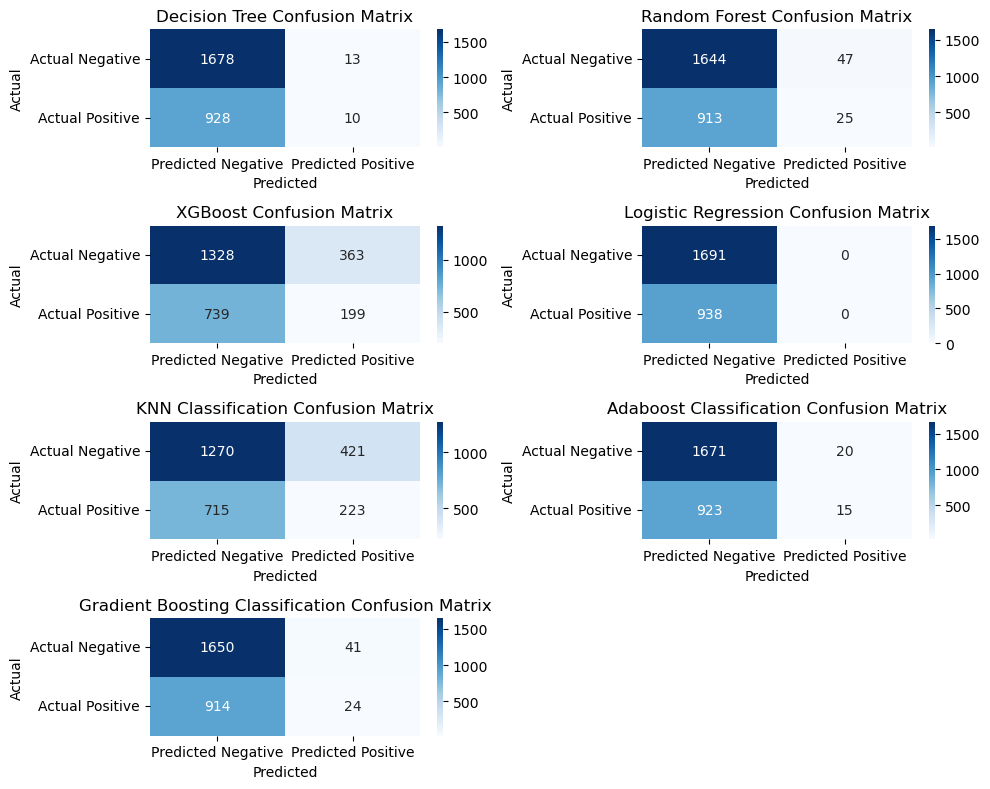

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
rcParams['figure.figsize'] = 10,8
fig, ax = plt.subplots(4,2)
sns.heatmap(tree_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[0,0])
ax[0,0].set_xlabel('Predicted')
ax[0,0].set_ylabel('Actual')
ax[0,0].set_title('Decision Tree Confusion Matrix')

sns.heatmap(rf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[0,1])
ax[0,1].set_xlabel('Predicted')
ax[0,1].set_ylabel('Actual')
ax[0,1].set_title('Random Forest Confusion Matrix')

sns.heatmap(xgboost_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[1,0])
ax[1,0].set_xlabel('Predicted')
ax[1,0].set_ylabel('Actual')
ax[1,0].set_title('XGBoost Confusion Matrix')

sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[1,1])
ax[1,1].set_xlabel('Predicted')
ax[1,1].set_ylabel('Actual')
ax[1,1].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[2,0])
ax[2,0].set_xlabel('Predicted')
ax[2,0].set_ylabel('Actual')
ax[2,0].set_title('KNN Classification Confusion Matrix')

sns.heatmap(ada_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[2,1])
ax[2,1].set_xlabel('Predicted')
ax[2,1].set_ylabel('Actual')
ax[2,1].set_title('Adaboost Classification Confusion Matrix')

sns.heatmap(gbc_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[3,0])
ax[3,0].set_xlabel('Predicted')
ax[3,0].set_ylabel('Actual')
ax[3,0].set_title('Gradient Boosting Classification Confusion Matrix')


blank_image = np.ones((100, 100, 3)) 
blank_image.fill(1) 
ax[3, 1].imshow(blank_image)
ax[3, 1].axis('off')

plt.tight_layout()  
plt.show()

# <u>Conclusion
### 1.Among the  seven models considered, Decision Tree Model is identified as the most suitable choice due to its balanced performance across various metrics like Accuracy, Precision and Recall scores.
### 2.Sedentary Hours Per Day, BMI, Triglycerides have more impact on the model's predictions.
### 3.From the bar graph, we can compare the Recall scores and can conclude the best model which is the Decision Tree model.